Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

Read Dataset

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

As per the data its a classification problem and We have to predict that this particular customer will leave bank or not.

In [4]:
row,column = df.shape 

print('Row size of the dataset:',row)
print('Row size of the dataset:',column)

Row size of the dataset: 10000
Row size of the dataset: 14


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

1.Besically we can see when the age is min customer is less exited then the maximum

2.when customer has the creditcard mostly customer is staying 

3.Active members are mostly staying


#### Data Preprocessing

Check the null values

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
print(df.isna().any().any())

False


They are no null values present in the data

Check outliers

In [10]:
def detect_outliers_all_columns(df):
    numerical_columns = df.select_dtypes(include=['number']).columns
    
    outliers_df = pd.DataFrame()
    
    
    
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        #calculating IQR
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #filter outliers and store in dictionary
        Outliers = df[(df[column]<lower_bound) | (df[column]>upper_bound)]
        outliers_df = pd.concat([outliers_df, Outliers])
    
    return outliers_df


outliers = detect_outliers_all_columns(df)
print("Outliers detected in all numerical columns:")
print(outliers)



        

Outliers detected in all numerical columns:
      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
7             8    15656148       Obinna          376   Germany  Female   29   
942         943    15804586          Lin          376    France  Female   46   
1193       1194    15779947       Thomas          363     Spain  Female   28   
1405       1406    15612494    Panicucci          359    France  Female   44   
1631       1632    15685372     Azubuike          350     Spain    Male   54   
...         ...         ...          ...          ...       ...     ...  ...   
9981       9982    15672754     Burbidge          498   Germany    Male   42   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42

Outliers using boxplot

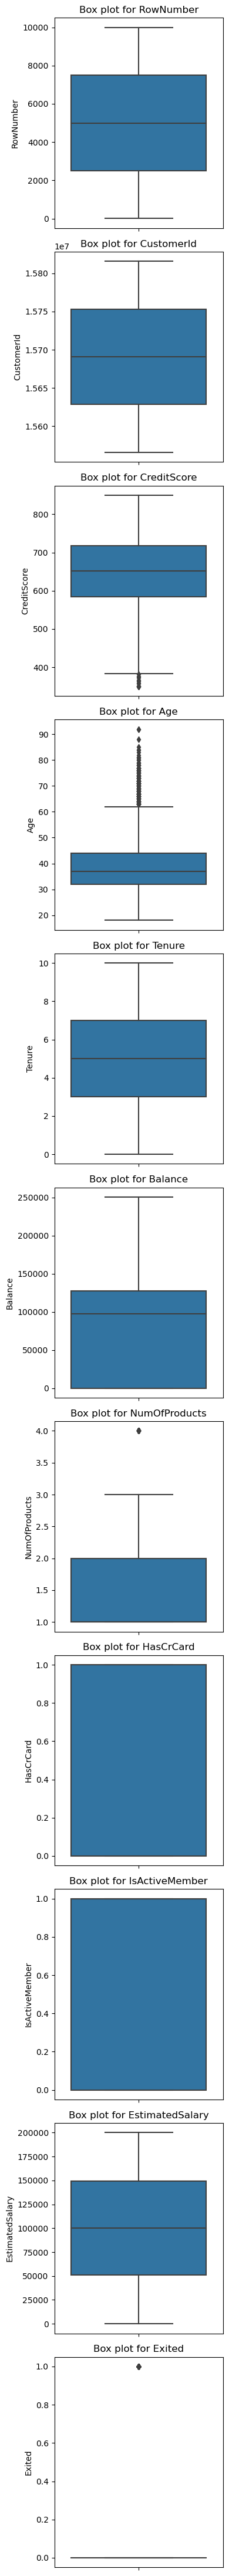

In [11]:
def box_plot_numerical_col(df):
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Create subplots for each numerical column
    fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(4, 4 * len(numerical_columns)))
    
    # Iterate through each numerical column and create box plot
    for i, column_name in enumerate(numerical_columns):
        sns.boxplot(data=df, y=column_name, ax=axes[i])
        axes[i].set_title(f'Box plot for {column_name}')
        axes[i].set_ylabel(column_name)
        
    plt.tight_layout()
    plt.show()

# Usage example
box_plot_numerical_col(df)


Can see the outliers in age column and no of product column

In [12]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [13]:
## row_number column is not requires so dropping that column
df.drop(['RowNumber','CustomerId','Surname'],axis = 1,inplace = True)

In [14]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

#### EDA(Exploratory Data Analysis )

In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

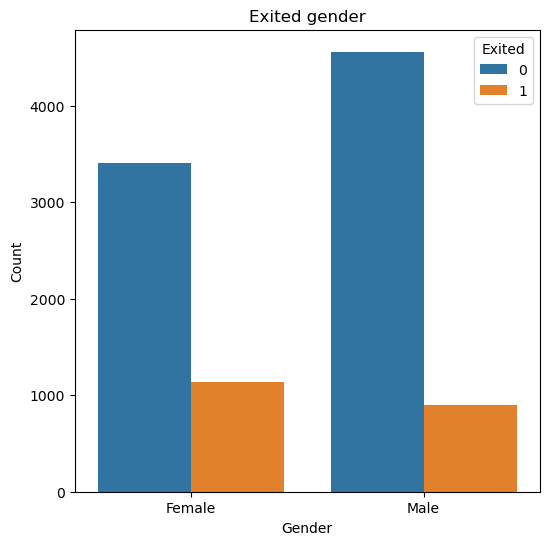

In [16]:
##lets check the the which gender is more exited 
plt.figure(figsize = (6,6))
sns.countplot(data = df,x = 'Gender',hue = 'Exited' )
plt.title('Exited gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Here we can see male has less exited then the female

In [17]:
df['Age'].unique()


array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

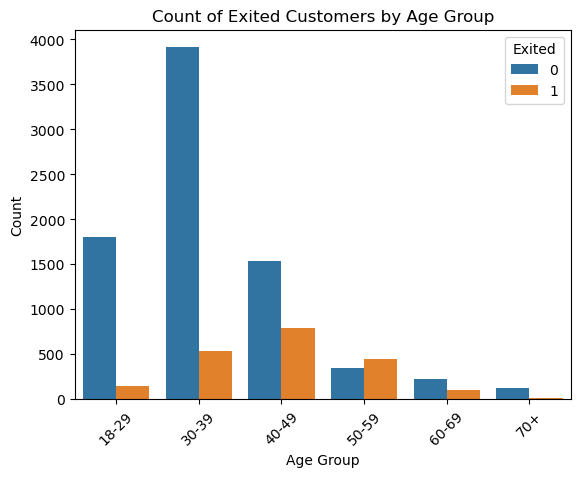

In [18]:

# Define age bins and labels
age_bins = [18, 30, 40, 50, 60, 70, 100]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Assign age groups to DataFrame
df['Age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Plot
sns.countplot(data=df, x='Age_group', hue='Exited')
plt.title('Count of Exited Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can see 40-49 age group customers are mosdtly exited 

In [19]:
##so there no need of age column so i am dropping the column
df.drop('Age',axis = 1,inplace = True)

In [20]:
df.head()

CreditScore Geography  Gender  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619    France  Female       2       0.00              1          1   
1          608     Spain  Female       1   83807.86              1          0   
2          502    France  Female       8  159660.80              3          1   
3          699    France  Female       1       0.00              2          0   
4          850     Spain  Female       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited Age_group  
0               1        101348.88       1     40-49  
1               1        112542.58       0     40-49  
2               0        113931.57       1     40-49  
3               0         93826.63       0     30-39  
4               1         79084.10       0     40-49

In [21]:
## geograpycal 
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

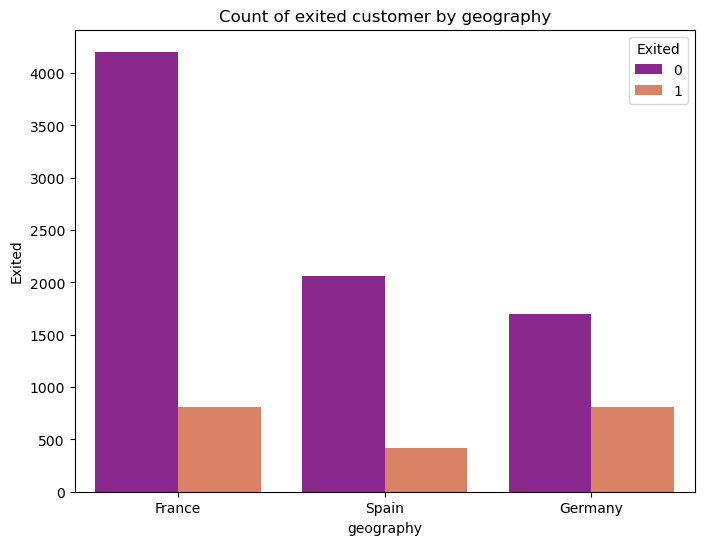

In [22]:
## lets check the from which country people are more exited

plt.figure(figsize =(8,6))
sns.countplot(data = df , x= 'Geography',hue = 'Exited',palette= 'plasma')
plt.title('Count of exited customer by geography')
plt.xlabel('geography')
plt.ylabel('Exited')
plt.show()


based on the geography Germany and france has same amount of customer who is exited

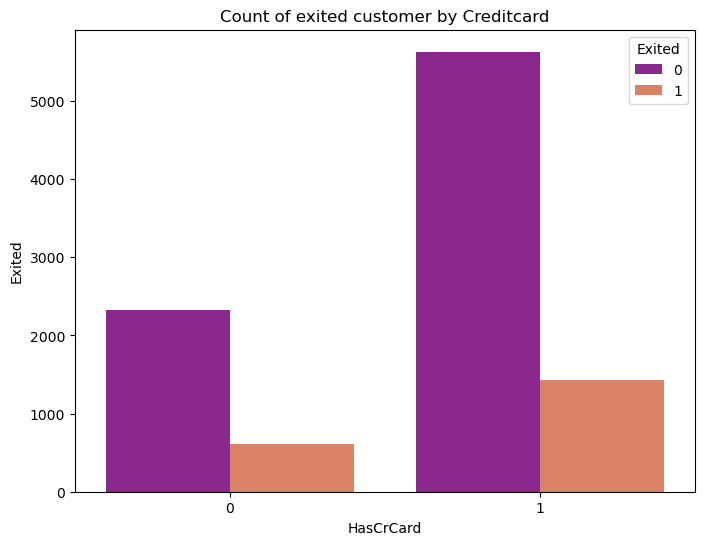

In [23]:
plt.figure(figsize =(8,6))
sns.countplot(data = df , x= 'HasCrCard',hue = 'Exited',palette= 'plasma')
plt.title('Count of exited customer by Creditcard')
plt.xlabel('HasCrCard')
plt.ylabel('Exited')
plt.show()


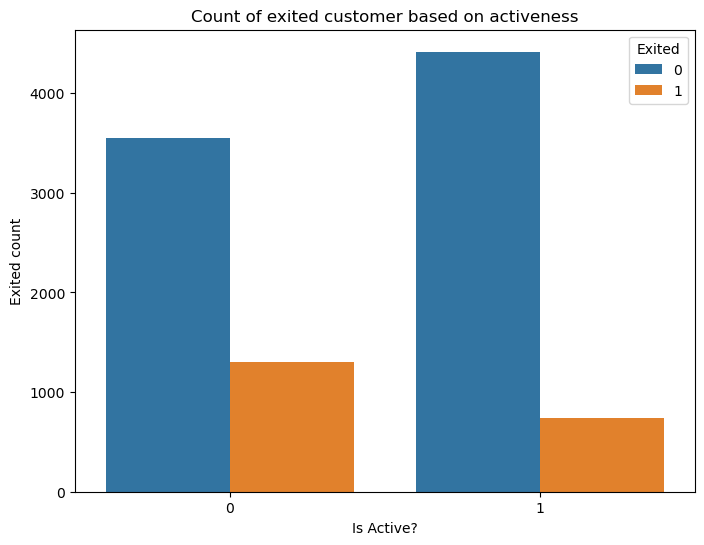

In [24]:
##Active members are staying or leaving
plt.figure(figsize = (8,6))
sns.countplot(data=df,x = 'IsActiveMember',hue = 'Exited')
plt.title('Count of exited customer based on activeness')
plt.xlabel('Is Active?')
plt.ylabel('Exited count')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [25]:
df['Geography'] = df['Geography'].map({'France': 1,
                                       'Germany': 0,
                                       'Spain':2})

In [26]:
df['Gender'] = df['Gender'].map({'Male': 0,
                                 'Female':1})

In [27]:
df.head()

CreditScore  Geography  Gender  Tenure    Balance  NumOfProducts  \
0          619          1       1       2       0.00              1   
1          608          2       1       1   83807.86              1   
2          502          1       1       8  159660.80              3   
3          699          1       1       1       0.00              2   
4          850          2       1       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited Age_group  
0          1               1        101348.88       1     40-49  
1          0               1        112542.58       0     40-49  
2          1               0        113931.57       1     40-49  
3          0               0         93826.63       0     30-39  
4          1               1         79084.10       0     40-49

In [28]:
## check datatypes
df.dtypes

CreditScore           int64
Geography             int64
Gender                int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
Age_group          category
dtype: object

In [29]:
df['Age_group'].value_counts()

Age_group
30-39    4451
40-49    2320
18-29    1946
50-59     797
60-69     331
70+       133
Name: count, dtype: int64

In [30]:
# change Age_group column from categorical to numerical
df['Age_group'] = df['Age_group'].map({'18-29':1,
                                       '30-39':2,
                                       '40-49':3,
                                       '50-59':4,
                                       '60-69':5,
                                       '70+':6})

In [31]:
df.head()

CreditScore  Geography  Gender  Tenure    Balance  NumOfProducts  \
0          619          1       1       2       0.00              1   
1          608          2       1       1   83807.86              1   
2          502          1       1       8  159660.80              3   
3          699          1       1       1       0.00              2   
4          850          2       1       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited Age_group  
0          1               1        101348.88       1         3  
1          0               1        112542.58       0         3  
2          1               0        113931.57       1         3  
3          0               0         93826.63       0         2  
4          1               1         79084.10       0         3

In [32]:
##check correlation between the table
correlation = df.corr()
correlation


CreditScore  Geography    Gender    Tenure   Balance  \
CreditScore         1.000000  -0.000478  0.002857  0.000842  0.006268   
Geography          -0.000478   1.000000 -0.025446  0.002713 -0.328736   
Gender              0.002857  -0.025446  1.000000 -0.014733 -0.012087   
Tenure              0.000842   0.002713 -0.014733  1.000000 -0.012254   
Balance             0.006268  -0.328736 -0.012087 -0.012254  1.000000   
NumOfProducts       0.012238   0.011923  0.021859  0.013444 -0.304180   
HasCrCard          -0.005458  -0.014734 -0.005766  0.022583 -0.014858   
IsActiveMember      0.025651   0.022807 -0.022544 -0.028362 -0.010084   
EstimatedSalary    -0.001384  -0.010285  0.008112  0.007784  0.012797   
Exited             -0.027094  -0.138714  0.106512 -0.014001  0.118533   
Age_group          -0.002961  -0.028114  0.023040 -0.011971  0.030074   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
CreditScore           0.012238  -0.005458        0.025651        -0.001384   
Geography             0.011923  -0.014734        0.022807        -0.010285   
Gender                0.021859  -0.005766       -0.022544         0.008112   
Tenure                0.013444   0.022583       -0.028362         0.007784   
Balance              -0.304180  -0.014858       -0.010084         0.012797   
NumOfProducts         1.000000   0.003183        0.009612         0.014204   
HasCrCard             0.003183   1.000000       -0.011866        -0.009933   
IsActiveMember        0.009612  -0.011866        1.000000        -0.011421   
EstimatedSalary       0.014204  -0.009933       -0.011421         1.000000   
Exited               -0.047820  -0.007138       -0.156128         0.012097   
Age_group            -0.031224  -0.013789        0.088479        -0.008765   

                   Exited  Age_group  
CreditScore     -0.027094  -0.002961  
Geography       -0.138714  -0.028114  
Gender           0.106512   0.023040  
Tenure          -0.014001  -0.011971  
Balance          0.118533   0.030074  
NumOfProducts   -0.047820  -0.031224  
HasCrCard       -0.007138  -0.013789  
IsActiveMember  -0.156128   0.088479  
EstimatedSalary  0.012097  -0.008765  
Exited           1.000000   0.275707  
Age_group        0.275707   1.000000

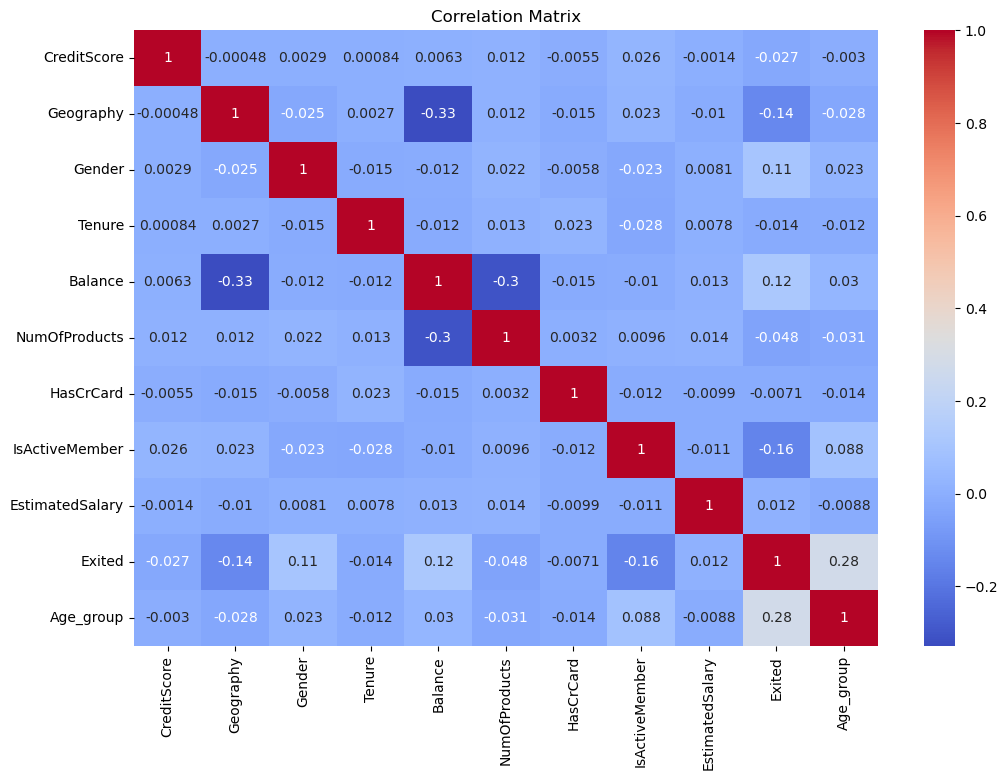

In [33]:
#lets plot heatmap to check visually

plt.figure(figsize = (12,8))
sns.heatmap(correlation,annot = True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [34]:
##Scaling the database
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

features_to_scale = ['CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df[features_to_scale] = sc.fit_transform(df[features_to_scale])

In [35]:
df.head()

CreditScore  Geography  Gender    Tenure   Balance  NumOfProducts  \
0    -0.326221          1       1 -1.041760 -1.225848      -0.911583   
1    -0.440036          2       1 -1.387538  0.117350      -0.911583   
2    -1.536794          1       1  1.032908  1.333053       2.527057   
3     0.501521          1       1 -1.387538 -1.225848       0.807737   
4     2.063884          2       1 -1.041760  0.785728      -0.911583   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited Age_group  
0          1               1         0.021886       1         3  
1          0               1         0.216534       0         3  
2          1               0         0.240687       1         3  
3          0               0        -0.108918       0         2  
4          1               1        -0.365276       0         3

In [36]:
X_train = df.drop('Exited',axis = 1)
y_train = df['Exited']

In [37]:
X_train.shape

(10000, 10)

In [38]:
y_train.shape

(10000,)

In [39]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X_train, y_train, test_size=0.3, random_state=42)

In [40]:
X_train.shape

(7000, 10)

In [41]:
y_train.shape

(7000,)

In [42]:
X_test.shape

(3000, 10)

In [43]:
y_test.shape

(3000,)

#### Logistic Regression

In [44]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Instantiate SimpleImputer with strategy 'mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Instantiate Logistic Regression Model
lr = LogisticRegression()

# Fit Logistic Regression Model
lr.fit(X_train_imputed, y_train)


LogisticRegression()

In [46]:
y_pred = lr.predict(X_test_imputed)

print(y_pred)

[0 0 0 ... 0 0 0]


In [52]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [56]:
accuracy_score = accuracy_score(y_pred,y_test)
precision_score = precision_score(y_pred,y_test)
recall_score = recall_score(y_pred,y_test)
f1_score = f1_score(y_pred,y_test)


print('accuracy_score = ',accuracy_score)
print('precision_score =' , precision_score)
print('recall_score = ', recall_score)
print('f1_score = ',f1_score)




accuracy_score =  0.8156666666666667
precision_score = 0.1934931506849315
recall_score =  0.5794871794871795
f1_score =  0.2901155327342747


In [57]:
## Roc- Auc curve

from sklearn.metrics import roc_curve

# Get predicted probabilities for the positive class
y_prob = lr.predict_proba(X_test_imputed)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


ROC curve is a plot of the true positive rate (Sensitivity) against the false positive rate (1 - Specificity) for different threshold values. It shows the trade-off between sensitivity and specificity.

In [58]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)


The AUC score represents the area under the ROC curve. It provides a single scalar value summarizing the performance of the classifier.

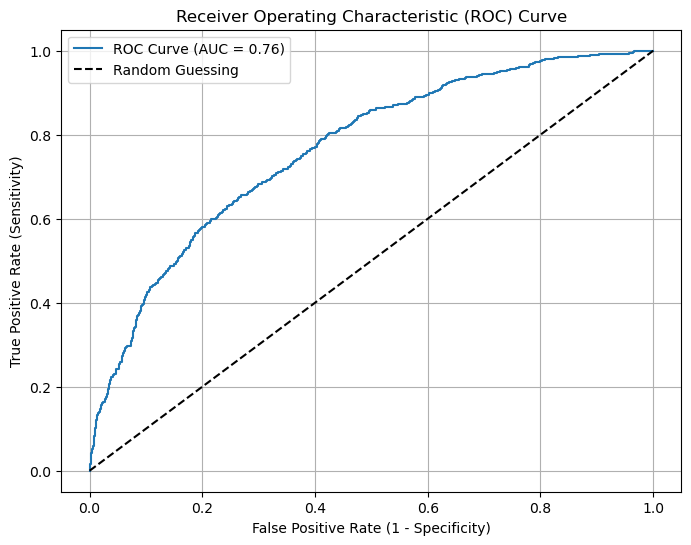

In [59]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [66]:
from sklearn.metrics import accuracy_score

# Make predictions on training data
y_train_pred = lr.predict(X_train_imputed)

# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)


In [67]:
from sklearn.metrics import accuracy_score

# Make predictions on test data
y_test_pred = lr.predict(X_test_imputed)

# Calculate accuracy on test data
test_accuracy = accuracy_score(y_test, y_test_pred)



In [68]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")


Training Accuracy: 0.81
Test Accuracy: 0.82
